In [101]:
# Prueba de hipótesis chi-square.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

from statsmodels.stats.stattools import durbin_watson

#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.linear_model import LinearRegression

In [102]:
path = "../datos/"
fname = "co2_mm_mlo_mod_2021.dat"
cols = ["year", "month", "decimal_date", "average",
    "interpolated", "trend", "ndays_1", "ndays_2"]

# Se lee el archivo .dat y se ajusta su formato.
df = pd.read_table(path + fname, names = cols, sep = "\s+")

df.head()

,year,month,decimal_date,average,interpolated,trend,ndays_1,ndays_2
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [103]:
x = df["decimal_date"]
y = df["average"]

YY = np.array([y]).T
x_1 = x
XX = np.array((np.ones_like(x_1), x_1)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )
BB.shape

y_reg = BB[0,0] + BB[1,0] * x_1

# Residuales.
res = y - y_reg

# ANOVA
n = df.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 2 ))
R = SSR / SST
F = SSR / Se ** 2
alpha = 5 / 100
F_crit = stats.f.ppf( 1 - alpha, 1,
    y.shape[0] - 2 )
p = stats.f.cdf( F, 1,
    y.shape[0] - 2 )
t_crit = stats.t.ppf( 1 - alpha/2,
    y.shape[0] - 2 )
t_sb = ( t_crit * Se / np.sqrt(
    ( ( x - x.mean() ) ** 2 ).sum()
    * (y.shape[0] - 2) ) )
durbin = durbin_watson(res)

print(f"n:            {n}")
print(f"a_1:             {BB[1,0]:.4f}")
print(f"b:            {BB[0,0]:.4f}")
print(f"X_mean:       {x.mean():.4f}")
print(f"Y_mean:       {y.mean():.4f}")
print(f"SST:        {SST:.4f}")
print(f"SSR:        {SSR:.4f}")
print(f"SSE:         {SSE:.4f}")
print(f"RMSE:          {Se:.4f}")
print(f"R:             {R:.4f}")
print(f"F:           {F:.4f}")
print(f"F_crit:        {F_crit:.4f}")
print(f"p:             {p:.4f}")
print(f"t_crit:        {t_crit:.4f}")
print(f"t_sb:          {t_sb:.4f}")
print(f"Durbin-Watson: {durbin:.4f}")

n:            763
a_1:             1.5987
b:            -2824.7549
X_mean:       1989.9577
Y_mean:       356.5601
SST:        672745.0477
SSR:        657043.8858
SSE:         15701.1619
RMSE:          4.5423
R:             0.9767
F:           31845.4393
F_crit:        3.8537
p:             1.0000
t_crit:        1.9631
t_sb:          0.0006
Durbin-Watson: 0.0738


Filliben Q-Q plot test: 0.9825


C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000023A4C046488> has a label of '_' which cannot be automatically added to the legend.
  # This is added back by InteractiveShellApp.init_path()


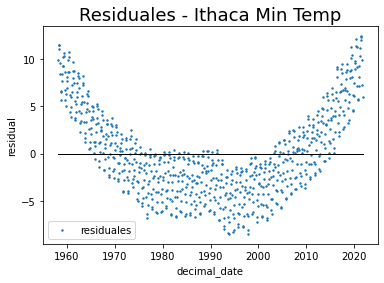

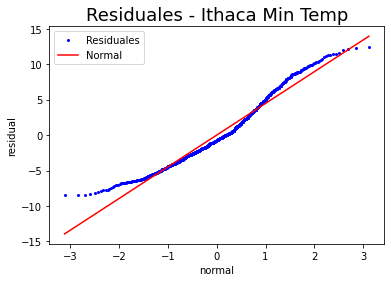

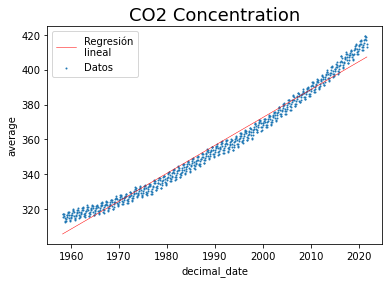

In [104]:
# Residuales - x
fig, ax = plt.subplots()
ax.scatter(x, res, s = 2)
ax.plot(x, np.zeros_like(x),
    color = "black", linewidth = 1)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel(x.name)
ax.set_ylabel("residual")
ax.legend(["_", "residuales"])

# Q-Q plot
fig, ax = plt.subplots()
qqplot = stats.probplot(res, plot = ax)
ax.get_lines()[0].set_markersize(2)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel("normal")
ax.set_ylabel("residual")
ax.legend(["Residuales", "Normal"])

print(f"Filliben Q-Q plot test: {qqplot[1][2]:.4f}")

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 1)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

ax.set_title("CO2 Concentration",
    fontsize = 18)
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
ax.legend(["Regresión\nlineal", "Datos"])

In [105]:
x = df["decimal_date"]
y = df["average"]

YY = np.array([y]).T
x_1 = x
x_2 = x ** 2
XX = np.array((np.ones_like(x_1), x_1, x_2)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )
BB.shape

y_reg = BB[0,0] + BB[1,0] * x_1 + BB[2,0] * x_2

# Residuales.
res = y - y_reg

# ANOVA
n = df.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 2 ))
R = SSR / SST
F = SSR / Se ** 2
alpha = 5 / 100
F_crit = stats.f.ppf( 1 - alpha, 1,
    y.shape[0] - 2 )
p = stats.f.cdf( F, 1,
    y.shape[0] - 2 )
t_crit = stats.t.ppf( 1 - alpha/2,
    y.shape[0] - 2 )
t_sb = ( t_crit * Se / np.sqrt(
    ( ( x - x.mean() ) ** 2 ).sum()
    * (y.shape[0] - 2) ) )
durbin = durbin_watson(res)

print(f"n:            {n}")
print(f"a_1:             {BB[1,0]:.4f}")
print(f"a_2:             {BB[2,0]:.4f}")
print(f"b:            {BB[0,0]:.4f}")
print(f"X_mean:       {x.mean():.4f}")
print(f"Y_mean:       {y.mean():.4f}")
print(f"SST:        {SST:.4f}")
print(f"SSR:        {SSR:.4f}")
print(f"SSE:         {SSE:.4f}")
print(f"RMSE:          {Se:.4f}")
print(f"R:             {R:.4f}")
print(f"F:           {F:.4f}")
print(f"F_crit:        {F_crit:.4f}")
print(f"p:             {p:.4f}")
print(f"t_crit:        {t_crit:.4f}")
print(f"t_sb:          {t_sb:.4f}")
print(f"Durbin-Watson: {durbin:.4f}")

n:            763
a_1:             -50.5746
a_2:             0.0131
b:            49082.1179
X_mean:       1989.9577
Y_mean:       356.5601
SST:        672745.0477
SSR:        668952.4174
SSE:         3792.6336
RMSE:          2.2324
R:             0.9944
F:           134226.7267
F_crit:        3.8537
p:             1.0000
t_crit:        1.9631
t_sb:          0.0003
Durbin-Watson: 0.3052


C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000023A4BE1B8C8> has a label of '_' which cannot be automatically added to the legend.
  # This is added back by InteractiveShellApp.init_path()


Filliben Q-Q plot test: 0.9898


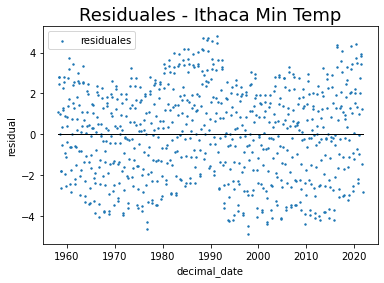

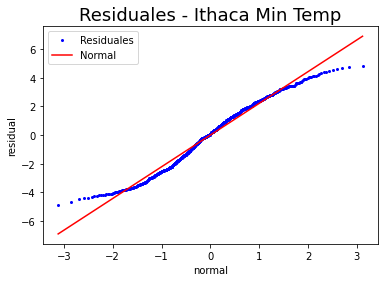

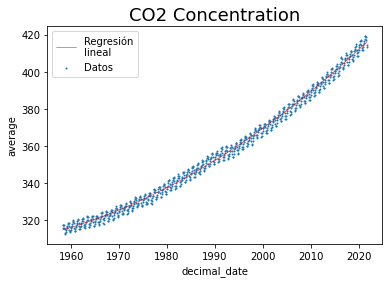

In [106]:
# Residuales - x
fig, ax = plt.subplots()
ax.scatter(x, res, s = 2)
ax.plot(x, np.zeros_like(x),
    color = "black", linewidth = 1)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel(x.name)
ax.set_ylabel("residual")
ax.legend(["_", "residuales"])

# Q-Q plot
fig, ax = plt.subplots()
qqplot = stats.probplot(res, plot = ax)
ax.get_lines()[0].set_markersize(2)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel("normal")
ax.set_ylabel("residual")
ax.legend(["Residuales", "Normal"])

print(f"Filliben Q-Q plot test: {qqplot[1][2]:.4f}")

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 1)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

ax.set_title("CO2 Concentration",
    fontsize = 18)
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
ax.legend(["Regresión\nlineal", "Datos"])

In [117]:
x = df["decimal_date"]
y = df["average"]

YY = np.array([y]).T
x_1 = x
x_2 = x_1 ** 2
x_3 = np.cos( 2 * np.pi * x_1 / 12 )
x_4 = np.sin( 2 * np.pi * x_1 / 12 )
XX = np.array((np.ones_like(x_1),
    x_1, x_2, x_3, x_4)).T

XX_sq = XX.T @ XX
XX_inv = np.linalg.inv(XX_sq)
BB = XX_inv @ ( XX.T @ YY )
BB.shape

y_reg = ( BB[0,0] + BB[1,0] * x_1 + BB[2,0] * x_2
     + BB[3,0] * x_3 + BB[4,0] * x_4 )

# Residuales.
res = y - y_reg

# ANOVA
n = df.shape[0]
SST = ( ( y - y.mean() ) ** 2 ).sum()
SSR = ( ( y_reg - y.mean() ) ** 2 ).sum()
SSE = ( ( y - y_reg ) ** 2 ).sum()
Se = np.sqrt(SSE / (y.shape[0] - 2 ))
R = SSR / SST
F = SSR / Se ** 2
alpha = 5 / 100
F_crit = stats.f.ppf( 1 - alpha, 1,
    y.shape[0] - 2 )
p = stats.f.cdf( F, 1,
    y.shape[0] - 2 )
t_crit = stats.t.ppf( 1 - alpha/2,
    y.shape[0] - 2 )
t_sb = ( t_crit * Se / np.sqrt(
    ( ( x - x.mean() ) ** 2 ).sum()
    * (y.shape[0] - 2) ) )
durbin = durbin_watson(res)

print(f"n:            {n}")
print(f"a_1:             {BB[1,0]:.4f}")
print(f"a_2:             {BB[2,0]:.4f}")
print(f"a_3:             {BB[3,0]:.4f}")
print(f"a_4:             {BB[4,0]:.4f}")
print(f"b:            {BB[0,0]:.4f}")
print(f"X_mean:       {x.mean():.4f}")
print(f"Y_mean:       {y.mean():.4f}")
print(f"SST:        {SST:.4f}")
print(f"SSR:        {SSR:.4f}")
print(f"SSE:         {SSE:.4f}")
print(f"RMSE:          {Se:.4f}")
print(f"R:             {R:.4f}")
print(f"F:           {F:.4f}")
print(f"F_crit:        {F_crit:.4f}")
print(f"p:             {p:.4f}")
print(f"t_crit:        {t_crit:.4f}")
print(f"t_sb:          {t_sb:.4f}")
print(f"Durbin-Watson: {durbin:.4f}")

n:            763
a_1:             -50.3545
a_2:             0.0131
a_3:             -0.0575
a_4:             0.1249
b:            48863.1873
X_mean:       1989.9577
Y_mean:       356.5601
SST:        672745.0477
SSR:        668959.5815
SSE:         3785.4627
RMSE:          2.2303
R:             0.9944
F:           134482.4333
F_crit:        3.8537
p:             1.0000
t_crit:        1.9631
t_sb:          0.0003
Durbin-Watson: 0.3057


C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000023A4BF29208> has a label of '_' which cannot be automatically added to the legend.
  # This is added back by InteractiveShellApp.init_path()


Filliben Q-Q plot test: 0.9702


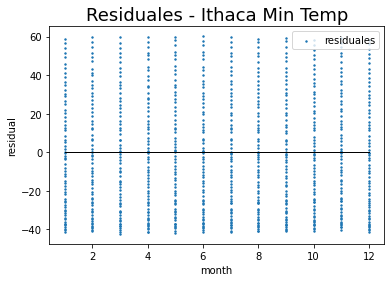

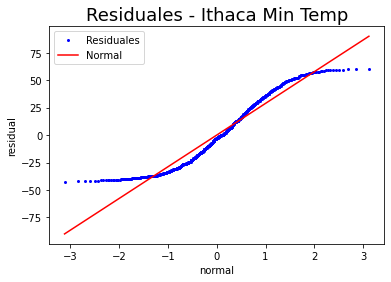

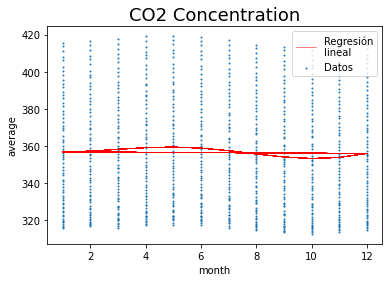

In [116]:
# Residuales - x
fig, ax = plt.subplots()
ax.scatter(x, res, s = 2)
ax.plot(x, np.zeros_like(x),
    color = "black", linewidth = 1)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel(x.name)
ax.set_ylabel("residual")
ax.legend(["_", "residuales"])

# Q-Q plot
fig, ax = plt.subplots()
qqplot = stats.probplot(res, plot = ax)
ax.get_lines()[0].set_markersize(2)

ax.set_title("Residuales - Ithaca Min Temp",
    fontsize = 18)
ax.set_xlabel("normal")
ax.set_ylabel("residual")
ax.legend(["Residuales", "Normal"])

print(f"Filliben Q-Q plot test: {qqplot[1][2]:.4f}")

# Se grafican los valores.
fig, ax = plt.subplots()
ax.scatter(x, y, s = 1)
ax.plot(x, y_reg, color = "r", linewidth = 0.5)

ax.set_title("CO2 Concentration",
    fontsize = 18)
ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
ax.legend(["Regresión\nlineal", "Datos"])